Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0927 - val_loss: 0.2479
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0696 - val_loss: 0.1739
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0420 - val_loss: 0.1016
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0200 - val_loss: 0.0400
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0118 - val_loss: 0.0155
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0130 - val_loss: 0.0168
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0101 - val_loss: 0.0253
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0094 - val_loss: 0.0256
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0063 - val_loss: 0.0208
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0080 - val_loss: 0.0158
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0083 - val_loss: 0.0153
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0052 - val_loss: 0.0162
Epoch 13/50

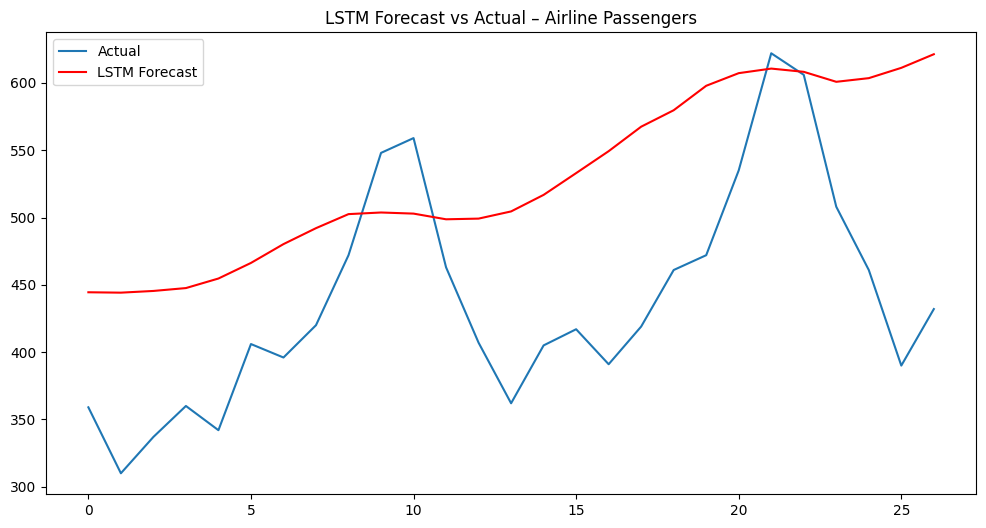

RMSE: 110.80


In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import sqrt

# Step 2: Load dataset
df = pd.read_csv('/content/ch3_airline_passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 3: Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Passengers']])

# Step 4: Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

sequence_length = 12  # previous 12 months to predict next month
X, y = create_sequences(scaled_data, sequence_length)

# Step 5: Train-test split
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Step 6: Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 7: Build LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=False, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Step 9: Predict and inverse transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Step 10: Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='LSTM Forecast', color='red')
plt.title('LSTM Forecast vs Actual – Airline Passengers')
plt.legend()
plt.show()

# Step 11: Evaluate performance
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {rmse:.2f}')
